<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b>: Prachiti Atigre <br>
<b>NetID</b>: pka24 <br>
<b>Recitation (1/2/3)</b>: 2<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>: PA     (eg: DC for Dingbang Chen)


<h3>Grader Notes</h3>
<b>Your Grade<b>:60/60<br>
<b>Grader Initials</b>:YM<br>
<b>Grader Comments</b> (optional):<br>
</div>

### CS 439 - Introduction to Data Science
### Spring 2022

# Lab 6: Image Processing

### Due Date : Monday May 02, 2022 by 11:59 PM.


### About the Lab
Any given image can be considered as a matrix of pixels where each pixel contains (R,G,B) values between 0-255. Each color is represented as an unsigned 8-bit integer. In this lab, we will learn how to read an image into an ndarray or data frame and manipulate that Frame to do some interesting operations on the image. We will also learn how to do low rank estimations using Singular Value Decomposition. You will learn how to find a low rank estimations for a given image and use concepts such as Singular Value Decomposition and/or Principal Component Analysis (PCA) to understand more about the image structure.


## Part 1 - Pre-processing of an image  (15 points)
In this part of the lab, we learn how to read an image into a ndarray and manipulate them using various techniques. So let's get started. First to make things simpler, we will initialize the two test images that you can test the code with. As a starter, you are provided with the images, guna-2014.jpg and robot.jpg, but you are encouraged to test the code with many different jpg images.

IMPORTANT: The row and column dimensions of the two images must be the same. If not, you can use paint or other tools to rescale your test images.

In [4]:
# This will help test the code with different test images
image1 = 'data/guna_2014.jpg'
image2 = 'data/robot_2.jpg'

### Task 1.1  Reading the image
In this first task, we would like you to read any jpg image into an ndarray using matplotlib.image.imread. Using matplotlib.pyplot.plt.imshow, you should be able to show the image on your notebook. Also print the dimensions of the image and type of the image in the notebook as shown. Please use your own image and other images for testing this. We will use many random images to see if your algorithm is correct. Both images must be the same dimensions.

<class 'numpy.ndarray'>
(300, 200, 3)


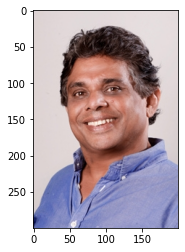

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

### BEGIN SOLUTION

img = mpimg.imread(image1)
print(type(img))
print(np.shape(img))
plt.imshow(img)

### END SOLUTION

### Task 1.2 Splitting the image into Red, Green and Blue portions.
The shape and type of the image should indicate that it is a 3D ndarray (row,col,color). The color is an array (R,G,B) where each color is represented by 1 byte (unsigned with range 0-225). In order to perform matrix operatins, we need to split the image into Red, Green and Blue components. Note that you still need to keep the image as a 3D array to plot. But you can make two of the component zero when plotting a specific color. Write the code to split the image into R, G and B and show the images as shown below.

#### Red image

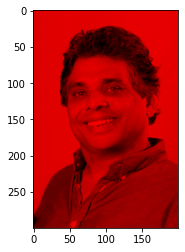

In [6]:
## TASK 1.2.1 Display the image using only the RED pixel values
## BEGIN SOLUTION

height, width, pix = np.shape(img)
red_img = np.zeros((height, width, pix),dtype=int)

red_img[:, :, 0] = img[:, :, 0]
imgplot = plt.imshow(red_img)

## END SOLUTION

#### Green image

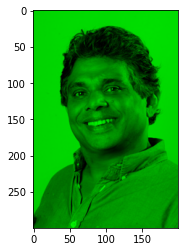

In [7]:
## TASK 1.2.2 Display the image using only the GREEN pixel values
## BEGIN SOLUTION

height, width, pix = np.shape(img)
green_img = np.zeros((height, width, pix),dtype=int)

green_img[:, :, 1] = img[:, :, 1]
imgplot = plt.imshow(green_img)
                     
## END SOLUTION

#### Blue image

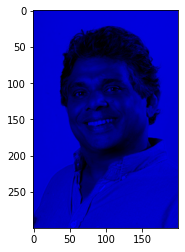

In [8]:
## TASK 1.2.3 Display the image using only the BLUE pixel values
## BEGIN SOLUTION
 
height, width, pix = np.shape(img)
blue_img = np.zeros((height, width, pix),dtype=int)

blue_img[:, :, 2] = img[:, :, 2]
imgplot = plt.imshow(blue_img)

## END SOLUTION

## Part 2 - Transforming images  (15 points)
In this part, we will use linear combinations of two images to transform one image to another. Given two images A and B, define a linear combination of the images as : p.A + (1-p).B  where p is a value (think of p as a probability) between 0 and 1. For example, if p = 0, then we only show image B, and if p=1, then we only show image A. For all other values of p, the two images are transposed on each other. When p is closer to 0, you will mostly notice image B, and if p is closer to 1, you will mostly notice image A. When p is in the middle, the intensity of the pixles will be equally divided between the two images.
In this case, define the matrix p A as, each entry of A is multiplied (or scaled by) p

### Task 2.1
First we will learn how to scale an image by some value p that is between 0 and 1. Write the code to form the matrix p.A for any p, and plot the image. Start with p=0.5 and change it to see how the intensity of the image changes.

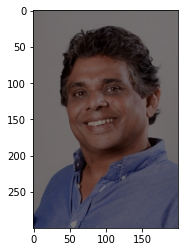

In [9]:
import numpy as np

## BEGIN SOLUTION

p = 0.5
height, width, pix = np.shape(img)
img_intensity = np.zeros((height, width, pix), dtype=int)

for i in range(height):
    for j in range(width):
        for k in range(pix):
            img_intensity[i][j][k] =  img[i][j][k] * p

imgplot = plt.imshow(img_intensity)

## END SOLUTION

### Task 2.2 Reading the second image and scaling
Use image2 to form the matrix (1-p).B for any p, and plot. Start with p=0.5 and change it (increase/decrease) between 0 and 1 to see how the intensity of the image changes. What if p > 1 or p < 0 ? How will you interpret it?  Also show the type of array and dimensions to make sure both images have the same dimensions (in order to superimpose of them properly)

<class 'numpy.ndarray'>
(300, 200, 3)


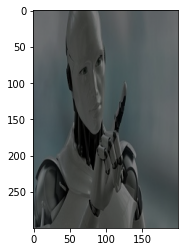

In [10]:
## BEGIN SOLUTION
p = 0.5
imgB =mpimg.imread('data/robot_2.jpg')

height, width, pix = np.shape(img)
for i in range(height):
    for j in range(width):
        for k in range(pix):
            imgB[i][j][k] =  imgB[i][j][k] * p

imgplot = plt.imshow(imgB)

print(type(imgB))
print(np.shape(imgB))
## END SOLUTION

### Task 2.3 overlay images on each other. 
Overlay the two images and plot the combined image again. The matrix addition can help here.

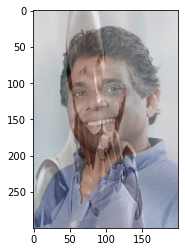

In [11]:
## BEGIN SOLUTION

height, width, pix = np.shape(img)
overlay_img = np.zeros((height, width, pix), dtype=int)

overlay_img = img_intensity + imgB
imgplot = plt.imshow(overlay_img)

## END SOLUTION

### Task 2.4 Interactive panel design
Now we will use a widget to create an interactive panel that will allow you to experiment with the superimposed images.

In [12]:
# Initialize the widget
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


### Define a function f 
The function f, takes alpha (which we called p before) and allow you to experiment with how the superimposed images changes as alpha changes. You will be able to drag the value between 0 and 1 to see how things change. With alpha = 0, you will get only one image, and with alpha = 1, you will get only the other image. The values of alpha between 0 and 1 will produce an image with varying domination by one image. Alpha = 0.5 is the equilibrium point, where each image is weighed equally.

In [13]:
##  BEGIN SOLUTION
def f(alpha):

    height, width, pix = np.shape(img)
    guna_img = np.zeros((height, width, pix), dtype=int)
    robot_img = np.zeros((height, width, pix), dtype=int)
    interact_img = np.zeros((height, width, pix), dtype=int)
    
    guna_img = img * alpha
    robot_img = imgB * (1-alpha)
    
    interact_img = guna_img + robot_img
    imgplot = plt.imshow((interact_img).astype(int))
    
##  END SOLUTION
interact(f, alpha=(0,1,0.1));

interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.0), Output()), _dom_classes=('widget-i…

## Part 3 - Application of Singular Value Decomposition  (15 points)
Singular value decomposition or SVD allows us to approximate the image using fewer bits of information about the structure of the image matrix. A readings on this method can be found from an excerpt of the <a href="https://www.abebooks.co.uk/servlet/BookDetailsPL?bi=30572579750&searchurl=an%3Dananda%2Bgunawardena%2Bsurender%2Bjain%26sortby%3D20%26tn%3Dlinear%2Balgebra%2Binteractive%2Bapproach&cm_sp=snippet-_-srp1-_-title1" target="_blank"> linear algebra book by Jain and Gunawardena.</a> <img src="https://pictures.abebooks.com/isbn/9780534409159-uk-300.jpg" height=200 width=100>

The singular value decomposition allows us to approximate a matrix using its decomposition into three matrices A = U S V^T
where U and V are orthogonal matrices and S is a diagonal matrix with singular values (V^T indicates the transpose of matrix V). The singular values are the eigen values of the matrix A A^T.

### Task 3.1 Representation of matrices as 2D
Prior to applying SVD to our image matrix, we need to transform the individual 3D matrices into 2D matrices. Basically, we can view any color component as color densities of one color and ignore the color dimension when we are transforming from 3D to 2D.

In [14]:
# transform the RED, GREEN, BLUE matrices into a 2D matrices of red, green, blue color density
# BEGIN SOLUTION
# create three 2D matrices (int type) each for colors, R, G, B. Be sure to match the 
# dimensions of the image matrix


# copy the corresponding values from 3D image matrix

R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

# END SOLUTION

print(R, G, B)

[[223 222 222 ... 231 229 229]
 [220 220 221 ... 229 227 227]
 [219 219 220 ... 229 229 229]
 ...
 [ 31  46  94 ... 142 148 137]
 [ 33  64  97 ... 140 142 131]
 [ 45  90  98 ... 139 129 125]] [[214 213 213 ... 222 223 223]
 [211 211 212 ... 220 221 221]
 [210 210 209 ... 220 220 220]
 ...
 [ 37  55 105 ... 148 151 140]
 [ 42  74 108 ... 146 148 137]
 [ 55 102 109 ... 145 134 130]] [[215 214 214 ... 223 223 223]
 [212 212 213 ... 221 221 221]
 [211 211 213 ... 221 221 221]
 ...
 [ 95 114 167 ... 200 202 191]
 [101 135 170 ... 198 200 189]
 [116 162 173 ... 195 189 185]]


### Task 3.1 Finding Singular values and Orthogonal matrices
Find the singular value decomposition of matrices R, G, B. List the singular values (S) and the orthogonal matrices (U, V) for colors R,G,B as (UR,sR, VhR), (UG,sG, VhG), (UB,sB, VhB).  

In [15]:
from scipy import linalg
# BEGIN SOLUTION

UR, sR, VhR = linalg.svd(R)
UG, sG, VhG = linalg.svd(G)
UB, sB, VhB = linalg.svd(B)

# END SOLUTION
print(sR, sG, sB)

[4.22972227e+04 6.71175879e+03 5.28368506e+03 3.44412427e+03
 3.00938794e+03 2.71181470e+03 2.05470898e+03 1.66349915e+03
 1.54910229e+03 1.39052039e+03 1.24894971e+03 1.08604346e+03
 1.04396448e+03 9.85246887e+02 9.28890442e+02 8.84175110e+02
 8.56392334e+02 7.85555725e+02 7.72333069e+02 7.34922852e+02
 7.01521729e+02 6.61331055e+02 6.27710205e+02 6.21664612e+02
 5.86594971e+02 5.50169495e+02 5.45563904e+02 5.26987244e+02
 5.09199310e+02 4.92431366e+02 4.76779724e+02 4.58711517e+02
 4.44963470e+02 4.37079254e+02 4.09270569e+02 4.02412537e+02
 3.88177582e+02 3.84915588e+02 3.69190582e+02 3.65291168e+02
 3.45406311e+02 3.36841736e+02 3.32141052e+02 3.21815430e+02
 3.09949097e+02 3.07535675e+02 3.00597565e+02 2.96512085e+02
 2.83284454e+02 2.76013550e+02 2.73490509e+02 2.61484985e+02
 2.55396957e+02 2.52798920e+02 2.49577240e+02 2.46207184e+02
 2.41013031e+02 2.35132416e+02 2.24388870e+02 2.22105499e+02
 2.18866989e+02 2.16026535e+02 2.08542786e+02 2.04583023e+02
 2.01555557e+02 2.005102

### Task 3.2 Finding a rank-1 approximation
A rank 1 approximation (starting with the highest eigenvalue lambda_1) 
can be done using $\lambda_{1}*u_1*v_1^T$ where $u_1$ and $v_1$ are column vectors. These column vectors are the first columns of the orthogonal matrices U and V, that are part of the SVD. We note that the multiplication of a column vector by a row vector in fact produces an approximated matrix.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


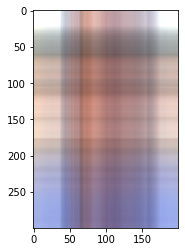

In [16]:
## Find the rank-1 approximation and show the image generated by it.
## BEGIN SOLUTION

dimensions = img.shape
newRank = np.zeros((dimensions[0], dimensions[1], dimensions[2]), int)

rank1_appro_R = UR[:, 0].reshape(len(UR[:, 0]), 1) * sR[0] * VhR[0, :]
rank1_appro_G = UG[:, 0].reshape(len(UG[:, 0]), 1) * sG[0] * VhG[0, :]
rank1_appro_B = UB[:, 0].reshape(len(UB[:, 0]), 1) * sB[0] * VhB[0, :]

newRank[:, : ,0] = rank1_appro_R
newRank[:, : ,1] = rank1_appro_G
newRank[:, : ,2] = rank1_appro_B

newRank  = abs(newRank)
newRank
mgplot = plt.imshow(newRank) 

## END SOLUTION

### Task 3.2 Finding a rank-2 approximation
A rank 2 approximation add another term to the rank_1 approximation as follows. If the second largest eigen value is lambda_2, then we have the approximation as  $\lambda_{1}*u_1*v_1^T + \lambda_{2}*u_2*v_2^T$ where $u_1, u_2$ and $v_1, v_2$ are column vectors

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


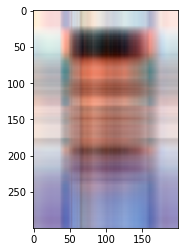

In [17]:
## Find the rank-2 approximation and show the image generated by it.
## BEGIN SOLUTION

dimensions = img.shape
newRank = np.zeros((dimensions[0], dimensions[1], dimensions[2]), int)

rank1_appro_R = UR[:, 0].reshape(len(UR[:, 0]), 1) * sR[0] * VhR[0, :]
rank1_appro_G = UG[:, 0].reshape(len(UG[:, 0]), 1) * sG[0] * VhG[0, :]
rank1_appro_B = UB[:, 0].reshape(len(UB[:, 0]), 1) * sB[0] * VhB[0, :]

rank2_appro_R = UR[:, 1].reshape(len(UR[:, 0]), 1) * sR[1] * VhR[1, :]
rank2_appro_G = UG[:, 1].reshape(len(UG[:, 0]), 1) * sG[1] * VhG[1, :]
rank2_appro_B = UB[:, 1].reshape(len(UB[:, 0]), 1) * sB[1] * VhB[1, :]

newRank[:, : ,0] = rank1_appro_R + rank2_appro_R
newRank[:, : ,1] = rank1_appro_G + rank2_appro_G
newRank[:, : ,2] = rank1_appro_B + rank2_appro_B
    
newRank  = abs(newRank)
newRank
mgplot = plt.imshow(newRank) 

## END SOLUTION

### Task 3.2 Finding a rank-k approximation
A rank k approximation is the sum of first k-terms of rank approximations. For example, if u[i] and v[i] are the i-th column vectors, and lambda_i is the i-th largest eigen value, then we have the approximation as 
$ \sum \lambda_{i}*u_i*v_i^T, i=1,2,...k$
Start with any k (including k=1 and k=2) to see if you get the same outcomes as above, and then changing it until you get a clearer image. You can play with k to see which one gives you a better approximation. The following is the image when k = 10

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


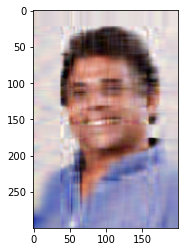

In [18]:
## Find the rank-k approximation and show the image generated by it.
## BEGIN SOLUTION
k = 10
dimensions = img.shape
newRank = np.zeros((dimensions[0], dimensions[1], dimensions[2]), int)

imgR = 0
imgG = 0
imgB = 0
    
for i in range (k):
    
    rank1_appro_R = UR[:, i].reshape(len(UR[:, 0]), 1) * sR[i] * VhR[i, :]
    rank1_appro_G = UG[:, i].reshape(len(UG[:, 0]), 1) * sG[i] * VhG[i, :]
    rank1_appro_B = UB[:, i].reshape(len(UB[:, 0]), 1) * sB[i] * VhB[i, :]
    
    imgR = imgR + rank1_appro_R
    imgG = imgG + rank1_appro_G
    imgB = imgB + rank1_appro_B
        
newRank[:, : ,0] = imgR
newRank[:, : ,1] = imgG
newRank[:, : ,2] = imgB

newRank  = abs(newRank)
newRank
mgplot = plt.imshow(newRank)  
## END SOLUTION

## Part 4 - Clustering Images Using K-Means  (points 15)
In this method we will use the 1700+ low resolution 8x8 images from sklearn and apply k-means algorithm to find how well it can group/cluster into similar digits. 

In [19]:
# install scikit-learn - ONLY ONCE
!pip install scikit-learn

### Load digits and visualize
Load the digits from sklearn into an image array. Print some digits. 

(1797, 64)


<Figure size 432x288 with 0 Axes>

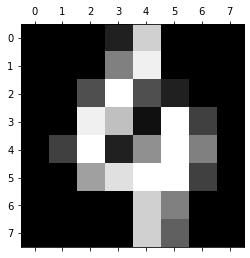

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[100])
plt.show()

### Task 4.1  Implement k-means algorithm
Implement k-means as shown in lecture notes. 

In [21]:
## BEGIN SOLUTION

def kmeans(X, k, max_iter=10):
    Mu = X[np.random.choice(X.shape[0],k),:]
    for i in range(max_iter):
        D = -2*X@Mu.T + (X**2).sum(axis=1)[:,None] + (Mu**2).sum(axis=1)
        C = np.eye(k)[np.argmin(D,axis=1),:]
        Mu = (C.T @ X)/np.sum(C, axis=0)[:,None]
    loss = np.linalg.norm(X - Mu[np.argmin(D,axis=1),:])**2
    return Mu, C, loss

## END SOLUTION

### Task 4.2  Flatten the 2D images
The original images are 8x8 images. Flatten them to represent them as dimension 64 vectors. 

In [22]:
## BEGIN SOLUTION

temp = []
for i in range (digits.data.shape[0]):
    temp.append(digits.images[i].flatten())

## END SOLUTION

### Task 4.3  Apply k-means to obtain k clusters
Note that the cluster centers are the approximate images. Vary k from 10 to 50 (in increments of 10 to see a reasonable cluster size). Print the cluster centers for each k to see how well they differentiate the images.

In [23]:
## BEGIN SOLUTION

np_matrix = np.array(temp)
[Mu, y, loss] = kmeans(np_matrix, 10)
print("Mu = ", Mu.shape)
print("y = ", y.shape)
print("loss = ", loss)

## END SOLUTION

Mu =  (10, 64)
y =  (1797, 10)
loss =  1188472.7365390738


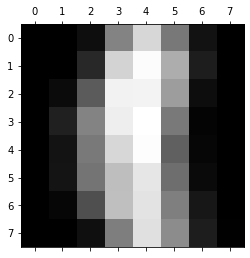

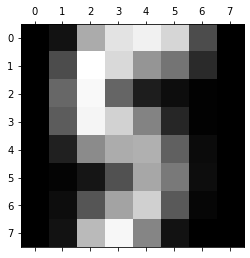

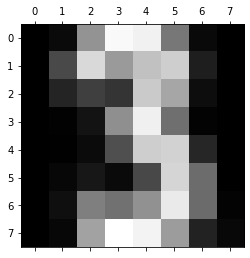

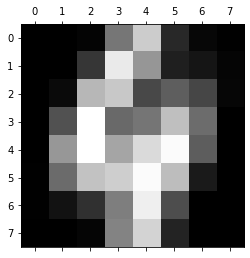

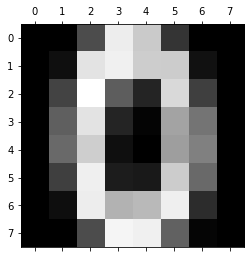

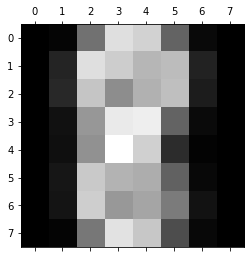

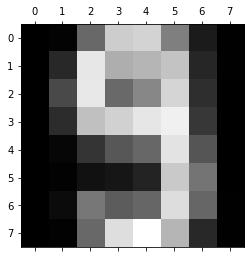

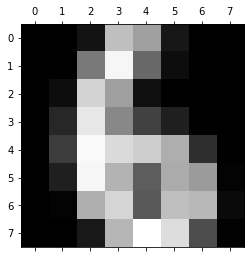

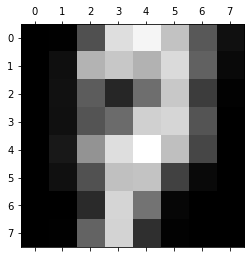

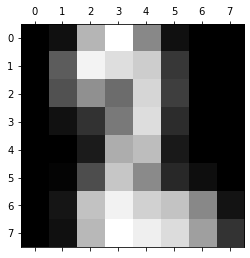

In [24]:
# Reshape cluster centers in Mu back to 8x8 matrices and print them
## BEGIN SOLUTION

for i in range (len(Mu)):
    plotThis = Mu[i].reshape(8,8)
    plt.matshow(plotThis)

## End SOLUTION

### Task 4.4  Observations
What sort of observations do you make as you vary the cluster size from 10 to 50. Answer following questions.
1. Does using 10 clusters give you a clear separation of the digits 0-9?  If not whY?
2. What is a good k (k=10, 20, .., 50) to see the representation of all digits?

#### BEGIN SOLUTION

1) 10 clusters does not give you a clear separation of the digits 0-9. Numbers such as 2 and 8 are missing.

2) Good values of k are 30, 40 and 50 since these 3 values of k give a clear separation of the digits 0-9.

#### END SOLUTION

### Feedback
Please provide feedback on this lab.
* how would you rate this lab (from 1-10, 10-highest) : I would rate this lab a 7/10
* how can we improve his lab? : It would have been better if more instructions were given in task 4 to understand what was required

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as your_section_your_netID_Lab6.jpynb<br>
<b> Submit To: </b> Canvas &rarr; Assignments &rarr; Lab6 <br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

##### Lab developed by A.D. Gunawardena @ 2022      ---           @All Rights Reserved     ---                DO not share this lab